In [1]:
import pandas as pd

# Lost art Dataset

Dataset of search notices for spoliated works.

In [2]:
df = pd.read_csv("data/lostart/lostart_export_start0.csv", sep=";")
df

,Meldungsart,Datensatzart,Lost Art ID,Hersteller/Künstler/Autor:in,Titel,Datierung,Objektart,Inventarnummer/Signatur,Beschreibung,Provenienz,Veröffentlicht seit,Kontakt,Link,Literatur / Quelle
0,Fundmeldung,Einzelobjekt,240311,"Pippich, Carl [Künstler:in]",Sperre gegen den Strom bei der Nußdorfer Schleuse,1899 [Datierung],Gemälde,HM 74.788,Signiert und datiert rechts unten: C. Pippich ...,NaN,2001-12-04,Historisches Museum der Stadt \nWienA-1040 Wie...,https://www.lostart.de/de/Fund/240311,NaN
1,Fundmeldung,Einzelobjekt,585306,"Liebermann, Max [Künstler:in]",Portrait Genia Fürstenberg / Bildnis Eugenie (...,1924/1925 [Datierung],Gemälde,1988-19,"Recto: oben rechts signiert: ""Max Liebermann.""...",o. D.: Max und Martha Liebermann; unbekannter ...,2020-01-20,Stiftung Schleswig-Holsteinische Landesmuseen ...,https://www.lostart.de/de/Fund/585306,Jahrbuch des Schleswig-Holsteinischen Landesmu...
2,Suchmeldung,Einzelobjekt,305099,"Weyden, Rogier van der (1) [Künstler:in]",Maria mit dem Kinde und einem musizierenden En...,NaN,Malerei,NaN,NaN,2008 restituiertStatusrestituiert,2004-10-18,HCPO (Holocaust Claims Processing Office)claim...,https://www.lostart.de/de/Verlust/305099,NaN
3,Fundmeldung,Einzelobjekt,310627,"Schischkin, Iwan Iwanowitsch (Kopie nach?) [Kü...",Waldlandschaft,NaN,Gemälde,NaN,Signatur unten rechts: I. Schischkin 1888,NaN,2005-10-06,"BKM Referat K 47\nKulturgutverluste, Provenien...",https://www.lostart.de/de/Fund/310627,NaN
4,Suchmeldung,Einzelobjekt,606086,"Géricault, Jean Louis André Theodore [Künstler...",Porträt des Malers Louis-Alexis Jamar,1819 [Datierung],Gemälde,NaN,NaN,"Sammlung von Jules Dupré, Paris, Kat. Ch. Clém...",2022-11-07,Agnes Peresztegi (Avocat)agnes@peresztegi.com,https://www.lostart.de/de/Verlust/606086,"Catalogue des Tableaux Anciens et Modernes, Aq..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Suchmeldung,Einzelobjekt,589689,"Unbekannt (Italienisch, Toskana - frühere Zusc...",Madonna mit Kind und den Heiligen Leonardo und...,1400/1440 (um) [Datierung],Gemälde,50554-57 (Bildnummer KHI),NaN,"Sammlung Agathe und Ernst Saulmann, Florenz - ...",2020-07-13,von Trott zu Solz Lammek (Rechtsanwälte • Nota...,https://www.lostart.de/de/Verlust/589689,IT - Kunsthistorisches Institut in Florenz (KH...
496,Suchmeldung,Einzelobjekt,589690,"Unbekannt (Spanisch, Katalonien) [Künstler:in]...",Predella,1450/1500 [Datierung],Gemälde,113293 (Bildnummer KHI); 50649 (Bildnummer KHI),"Predella, Mittelteil: Toter Christus von zwei ...","Sammlung Agathe und Ernst Saulmann, Florenz - ...",2020-07-13,von Trott zu Solz Lammek (Rechtsanwälte • Nota...,https://www.lostart.de/de/Verlust/589690,IT - Kunsthistorisches Institut in Florenz (KH...
497,Suchmeldung,Einzelobjekt,589691,Unbekannt (Italienisch) [Künstler:in],Madonna mit Kind,1450/1500 [Datierung],Gemälde,50650 (Bildnummer KHI),NaN,"Sammlung Agathe und Ernst Saulmann, Florenz - ...",2020-07-13,von Trott zu Solz Lammek (Rechtsanwälte • Nota...,https://www.lostart.de/de/Verlust/589691,IT - Kunsthistorisches Institut in Florenz (KH...
498,Suchmeldung,Einzelobjekt,589692,"Guardi, Francesco de' (Nachahmer?) [Künstler:in]",Vedute,NaN,Gemälde,50651 (Bildnummer KHI),NaN,"Sammlung Agathe und Ernst Saulmann, Florenz - ...",2020-07-13,von Trott zu Solz Lammek (Rechtsanwälte • Nota...,https://www.lostart.de/de/Verlust/589692,IT - Kunsthistorisches Institut in Florenz (KH...


In [3]:
print(df.columns)

# Meldungsart: Type de message
# Datensatzart: Type d'enregistrement
# Lost Art ID: ID Lost Art
# Hersteller/Künstler/Autor:in: Producteur/artiste/auteur:in
# Titel: Titre
# Datierung: Datation
# Objektart: Type d'objet
# Inventarnummer/Signatur: Numéro d'inventaire/signature
# Beschreibung: Description
# Provenienz: Provenance
# Veröffentlicht seit: Publié depuis
# Kontakt: Contact
# Link: Lien
# Literatur/Quelle: Littérature / source

Index(['Meldungsart', 'Datensatzart', 'Lost Art ID',
       'Hersteller/Künstler/Autor:in', 'Titel', 'Datierung', 'Objektart',
       'Inventarnummer/Signatur', 'Beschreibung', 'Provenienz',
       'Veröffentlicht seit', 'Kontakt', 'Link', 'Literatur / Quelle'],
      dtype='object')


In [4]:
# Missing values
print(df.isnull().sum())

Meldungsart                       0
Datensatzart                      0
Lost Art ID                       0
Hersteller/Künstler/Autor:in      0
Titel                             0
Datierung                       108
Objektart                         0
Inventarnummer/Signatur         166
Beschreibung                     60
Provenienz                        4
Veröffentlicht seit               0
Kontakt                          30
Link                              0
Literatur / Quelle              332
dtype: int64


In [5]:
# Fundmeldung: Annonce de la découverte
# Suchmeldung: Avis de recherche

print(df["Meldungsart"].value_counts())

Meldungsart
Fundmeldung    274
Suchmeldung    226
Name: count, dtype: int64


Missing description: 60 / 500 (12.00%)


<Axes: >

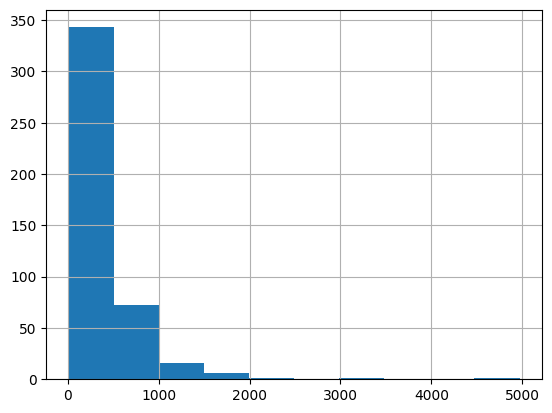

In [6]:
# Missing description
print("Missing description:", df["Beschreibung"].isnull().sum(), "/", len(df), f"({df['Beschreibung'].isnull().sum() / len(df) * 100:.2f}%)")

# Plot description sizes
df["Beschreibung"].str.len().hist()

### Downloading images

In [7]:
import os
from utils import download_image, extract_image_url


download = False

csv_file_path = "data/lostart/lostart_export_start0.csv"
df = pd.read_csv(csv_file_path, sep=";")

save_folder = "data/images"
os.makedirs(save_folder, exist_ok=True)

if download:
    for index, row in df.iterrows():
        page_url = row['Link']
        image_url = extract_image_url(page_url)
        image_id = row['Lost Art ID']
        print(f"Téléchargement de l'image pour l'ID {image_id}...")
        if image_url:
            download_image(image_url, save_folder, image_id)

    print("Téléchargement terminé pour toutes les images.")

# Rose Valland DataBase (POP)

MNR Rose Valland database, which contains spoliated works returned to France.

In [8]:
pop = pd.read_excel("data/mnr_20250303_17h40m54s.ods")
pop.head()

,REF,POP_COMMENTAIRES,POP_FLAGS,POP_IMPORT,AATT,AFFE,ATIT,ATTR,AUTI,AUTR,...,REPR,RESUME,SALLES,SCLE,SREP,STYL,SUITE,TECH,TITR,VIDEO
0,MNR00329,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Saint Jérôme ; Saint Antoine,NaN,NaN,RIBERA Jusepe de (d'après),...,"figure (saint Jérôme, pénitence, crâne, nudité)",NaN,NaN,17e siècle,NaN,NaN,NaN,Toile;peinture à l'huile,Saint Jérôme pénitent,mnr/MNR00329/MNR329-copyright-RMN-Grand_Palais...
1,MNR00330,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Bethléem,NaN,NaN,COLLANTES Francisco,...,"scène biblique (Sainte Famille, arrivée, Bethl...",NaN,NaN,17e siècle,Bible : Nouveau Testament,NaN,NaN,Toile;peinture à l'huile,Arrivée à Bethléem,mnr/MNR00330/MNR330_CopyrightRMN-GP_Franck-Rau...
2,MNR00331,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Les Beautés au balcon#Les Belles au balcon,NaN,NaN,"LUCAS Y VELAZQUEZ, Eugenio (autrefois LUCAS Y ...",...,"scène (homme : assis, femme : assis, espagnol,...",NaN,12/09/2019 : oui,19e siècle,NaN,NaN,NaN,Toile;peinture à l'huile,Hommes et femmes espagnols à une tribune,mnr/MNR00331/MNR331_copyright-MuseeduLouvre_1....
3,MNR00332,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Évêque avec sainte Agnès#Composition religieus...,VALDES Léal ; SHUT Cornelis.,NaN,THULDEN Théodore van ? Anonyme,...,"figures (saint François d'Assise, saint August...",NaN,"25/09/2019 : non, mais sera exposé après rénov...",17e siècle,NaN,NaN,NaN,Toile;peinture à l'huile,"Religieuse avec saint Augustin, sainte Agnès e...",mnr/MNR00332/MNR332-copyright-Musee_Goya_Castr...
4,MNR00333,NaN,NaN,6319fd4a4e2f920b275837a5;6319fd4a4e2f920b27583...,NaN,Paris ; musée du Louvre ; département des Pein...,Portrait d'homme puis Portrait d'un écrivain,"RAEBURN, Sir Henry",NaN,REYNOLDS Sir Joshua,...,"portrait (Chambers William, homme, en buste, d...",NaN,NaN,18e siècle,NaN,NaN,NaN,Bois;peinture à l'huile,Portrait de Sir William Chambers (1723-1796),mnr/MNR00333/MNR333-copyright_Musees_de_la_vil...


In [9]:
print(pop.columns)

Index(['REF', 'POP_COMMENTAIRES', 'POP_FLAGS', 'POP_IMPORT', 'AATT', 'AFFE',
       'ATIT', 'ATTR', 'AUTI', 'AUTR', 'BASE', 'BIBL', 'CARTELS', 'CATE',
       'COMM', 'CONTIENT_IMAGE', 'DENO', 'DESC', 'DIMS', 'DMAJ', 'DMIS',
       'DOMN', 'DREP', 'ECOL', 'ETAT', 'EXPO', 'GENE', 'HIST', 'HIST2',
       'HIST3', 'HIST4', 'HISTORIQUE', 'INSC', 'INV', 'LOCA', 'MARQ', 'MILL',
       'NET', 'NOTE', 'NOTE2', 'NUMS', 'OBSE', 'PAUT', 'PHOT', 'PREP',
       'PRODUCTEUR', 'PROV', 'PTIT', 'RCL', 'REDC', 'REFIM', 'RENV', 'REPR',
       'RESUME', 'SALLES', 'SCLE', 'SREP', 'STYL', 'SUITE', 'TECH', 'TITR',
       'VIDEO'],
      dtype='object')


In [10]:
pd.set_option('display.max_rows', 100)

print(pop.isnull().sum())

REF                    0
POP_COMMENTAIRES    2456
POP_FLAGS           2456
POP_IMPORT             0
AATT                2292
AFFE                 425
ATIT                1434
ATTR                1953
AUTI                2382
AUTR                  60
BASE                   0
BIBL                1172
CARTELS             2157
CATE                 247
COMM                  17
CONTIENT_IMAGE         0
DENO                2190
DESC                1350
DIMS                 123
DMAJ                   0
DMIS                2205
DOMN                  16
DREP                2436
ECOL                 450
ETAT                1870
EXPO                1291
GENE                2184
HIST                 245
HIST2               2452
HIST3                  5
HIST4               2265
HISTORIQUE             0
INSC                1672
INV                  246
LOCA                 202
MARQ                 876
MILL                1795
NET                 2071
NOTE                 307
NOTE2                246


Missing description:  1350 / 2456 (54.97%)
Missing image:  59 / 2456 (2.40%)


<Axes: >

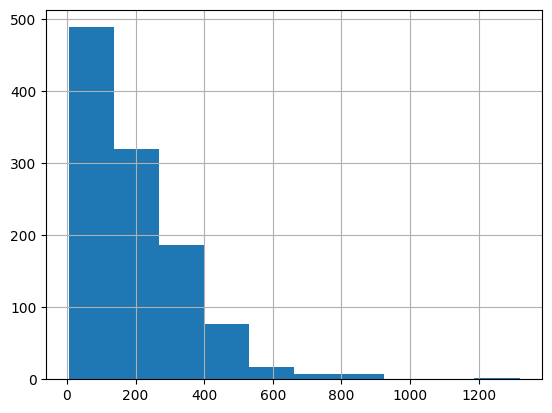

In [11]:
# Missing description
print("Missing description: ", pop["DESC"].isnull().sum(), "/", len(pop), f"({(pop["DESC"].isnull().sum() / len(pop) * 100):.2f}%)")

# Missing image
print("Missing image: ", len(pop[pop["CONTIENT_IMAGE"] == "non"]), "/", len(pop), f"({len(pop[pop['CONTIENT_IMAGE'] == 'non']) / len(pop) * 100:.2f}%)")

# Description sizes
pop["DESC"].str.len().hist()

In [12]:
print(pop["CATE"].value_counts())

CATE
Oeuvre dont l'historique est incomplet entre 1933 et 1945, en l'état des recherches actuelles.    1741
Oeuvre assurément spoliée.                                                                         158
Oeuvre assurément non spoliée.                                                                     119
Oeuvre probablement spoliée, en l'état des recherches actuelles.                                    70
Oeuvre assurément spoliée, propriétaire inconnu en l’état des recherches actuelles.                 65
Oeuvre probablement non spoliée, en l'état des recherches actuelles.                                51
Oeuvre assurément non spoliée, en l'état des recherches actuelles.                                   2
Oeuvre probablement non spoliée.                                                                     1
Oeuvre dont l'historique est incomplet entre 1933 et 1945, en l'état des recherches actuelles        1
Œuvre probablement non spoliée, en l’état des recherches actuelles. 

In [13]:
import requests
from bs4 import BeautifulSoup
import os
from urllib.parse import urljoin

def download_all_slider_images(page_url, download_dir="downloaded_images"):
    # Create download directory if it doesn't exist
    if not os.path.exists(download_dir):
        os.makedirs(download_dir)
    
    # Get the page content
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Error retrieving page: {response.status_code}")
        return
    
    # Parse HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find all slider images (all slides, not just the active one)
    slider_images = soup.find_all("div", class_="swiper-slide")
    
    if not slider_images:
        print("No slider images found on the page")
        return
    
    # Download each image
    for i, slide in enumerate(slider_images):
        img_tag = slide.find("img")
        if img_tag and img_tag.get('src'):
            img_url = img_tag['src']
            # Handle relative URLs
            if not img_url.startswith(('http://', 'https://')):
                img_url = urljoin(page_url, img_url)
            
            # Extract filename from URL or create a sequential one
            filename = os.path.basename(img_url)
            if not filename:
                filename = f"image_{i+1}.jpg"
            
            # Download and save the image
            img_response = requests.get(img_url)
            if img_response.status_code == 200:
                filepath = os.path.join(download_dir, filename)
                with open(filepath, 'wb') as f:
                    f.write(img_response.content)
                print(f"Downloaded: {filename}")
            else:
                print(f"Failed to download image {i+1}: {img_url}")
    
    print(f"Finished. Images saved to {download_dir}/")

# Use the function
url = "https://pop.culture.gouv.fr/notice/mnr/MNR00342"
download_all_slider_images(url)

Downloaded: MNR342_face_encadree-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_copyright-RMN-Grand_Palais_face_decadree.jpg
Downloaded: MNR342_revers_encadre-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_detail_etiquette-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_detail_inscription-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_detail_inscription2-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_detail_inscription3-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_detail_inscription4-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_detail_inscription5-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_detail_inscription6-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
Downloaded: MNR342_detail_inscription7-copyright-Musee_du_Louvre-Departement_des_Peintures.jpg
D